# 14장 모델의 성능 향상시키기

### 1. 데이터의 확인과 검증셋

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), 460.93 KiB | 1.87 MiB/s, done.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [3]:
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 1s 29ms/step - loss: 0.7502 - accuracy: 0.7480 - val_loss: 0.5808 - val_accuracy: 0.6931
Epoch 2/50
8/8 [==============================] - 0

In [4]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9615
Test accuracy: 0.9615384340286255


## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 깃허브에 준비된 데이터를 가져옵니다. 앞에서 이미 데이터를 가져왔으므로 주석 처리합니다. 2번 예제만 별도 실행 시 주석을 해제한 후 실행해주세요.
# !git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 모델의 저장 설정 및 실행

In [6]:
# 모델 저장의 조건을 설정합니다.
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.7492.hdf5

Epoch 2: saving model to ./data/model/all/02-0.8215.hdf5

Epoch 3: saving model to ./data/model/all/03-0.9146.hdf5

Epoch 4: saving model to ./data/model/all/04-0.9262.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9262.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9292.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9246.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9300.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9292.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9308.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9331.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9315.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9315.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9331.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9338.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9346.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9362.hdf5

Epoch

In [7]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1165 - accuracy: 0.9600
Test accuracy: 0.9599999785423279


## 3. 그래프로 과적합 확인하기

In [8]:
# 그래프 확인을 위한 긴 학습 
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1071 - accuracy: 0.9623 - val_loss: 0.1223 - val_accuracy: 0.9600
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1051 - accuracy: 0.9666 - val_loss: 0.1289 - val_accuracy: 0.9492
Epoch 3/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1075 - accuracy: 0.9638 - val_loss: 0.1218 - val_accuracy: 0.9554
Epoch 4/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1041 - accuracy: 0.9633 - val_loss: 0.1193 - val_accuracy: 0.9631
Epoch 5/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1022 - accuracy: 0.9674 - val_loss: 0.1224 - val_accuracy: 0.9569
Epoch 6/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1040 - accuracy: 0.9651 - val_loss: 0.1178 - val_accuracy: 0.9631
Epoch 7/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1040 - accuracy: 0.9659 - val_loss: 0.1172 - val_accuracy: 0.9638
Epoch 8/2000
8/8 [

In [12]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.107123,0.962279,0.122260,0.960000
1,0.105056,0.966641,0.128908,0.949231
2,0.107467,0.963818,0.121756,0.955385
3,0.104074,0.963305,0.119340,0.963077
4,0.102155,0.967411,0.122441,0.956923
...,...,...,...,...
1995,0.023866,0.991532,0.117438,0.988462
1996,0.019127,0.994868,0.121055,0.986923
1997,0.017928,0.995381,0.118125,0.987692
1998,0.017144,0.995124,0.123459,0.986154


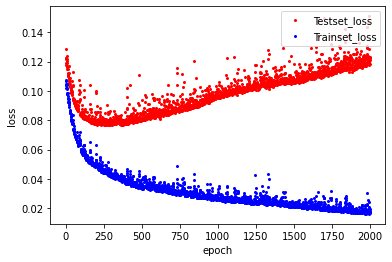

In [13]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

#x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단

### 기본 코드 불러오기

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다. 앞에서 이미 데이터를 가져왔으므로 주석 처리합니다. 2번 예제만 별도 실행 시 주석을 해제한 후 실행해주세요.
# !git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

fatal: destination path 'data' already exists and is not an empty directory.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 학습의 자동 중단 및 최적화 모델 저장

In [15]:
# 학습이 언제 자동 중단될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 [==============================] - 1s 50ms/step - loss: 0.4527 - accuracy: 0.7557 - val_loss: 0.3991 - val_accuracy: 0.7623
Epoch 2/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3863 - accuracy: 0.7557 - val_loss: 0.3583 - val_accuracy: 0.7623
Epoch 3/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3525 - accuracy: 0.7562 - val_loss: 0.3325 - val_accuracy: 0.7623
Epoch 4/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3299 - accuracy: 0.7716 - val_loss: 0.3129 - val_accuracy: 0.8131
Epoch 5/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.3137 - accuracy: 0.8412 - val_loss: 0.2960 - val_accuracy: 0.8846
Epoch 6/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2982 - accuracy: 0.8727 - val_loss: 0.2806 - val_accuracy: 0.9115
Epoch 7/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.2800 - accuracy: 0.8940 - val_loss: 0.2614 - val_accuracy: 0.9285
Epoch 8/2000


In [16]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9800
Test accuracy: 0.9800000190734863
